In [48]:
#!pip install keras
!pip install tensorflow

In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.chdir(r"C:\Users\HP\Desktop\shetisahayak")
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [52]:
corn_dir = r'datasets\BangladeshiCrops\Crop___Disease\Corn'
potato_dir = r'datasets\BangladeshiCrops\Crop___Disease\Potato'
rice_dir = r'datasets\BangladeshiCrops\Crop___Disease\Rice'
wheat_dir = r'datasets\BangladeshiCrops\Crop___Disease\Wheat'

# Split df to train test

In [21]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


# Corn

In [54]:
import splitfolders

# Define paths
input_folder = corn_dir
output_folder = r'datasets\BangladeshiCrops/working/corn'

# Split the dataset into train, validation, and test sets
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.15, 0.15))


Copying files: 3852 files [00:08, 479.60 files/s]


## Data/image Generate with preprocessing

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = "datasets/BangladeshiCrops/working/corn/train"
test_dir = "datasets/BangladeshiCrops/working/corn/test"
val_dir = "datasets/BangladeshiCrops/working/corn/val"
generator_train = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)
generator_test = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)

generator_val = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)
train_ds = generator_train.flow_from_directory(train_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
test_ds = generator_test.flow_from_directory(test_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
val_ds = generator_val.flow_from_directory(val_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")


Found 2695 images belonging to 4 classes.
Found 582 images belonging to 4 classes.
Found 575 images belonging to 4 classes.


In [36]:
train_ds

## Desing CNN mode

In [38]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, MaxPool2D



# Build the CNN model
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),
                 padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))
model.add(Conv2D(32, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))

model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=4,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


# Train the model
hist = model.fit(train_ds, batch_size=5, epochs=5, validation_split=5, validation_data=test_ds)


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 28s 289ms/step - accuracy: 0.5925 - loss: 0.9240 - val_accuracy: 0.7680 - val_loss: 0.5091
Epoch 2/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.8208 - loss: 0.3940 - val_accuracy: 0.8986 - val_loss: 0.2411
Epoch 3/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 253ms/step - accuracy: 0.8682 - loss: 0.2999 - val_accuracy: 0.8832 - val_loss: 0.2451
Epoch 4/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.8835 - loss: 0.2529 - val_accuracy: 0.9038 - val_loss: 0.2015
Epoch 5/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 264ms/step - accuracy: 0.8971 - loss: 0.2325 - val_accuracy: 0.9227 - val_loss: 0.1761


In [39]:
print('MODEL ACCURACY = {}%'.format(hist.history["accuracy"][-1]*100))

MODEL ACCURACY = 90.05565643310547%


## Loss curve

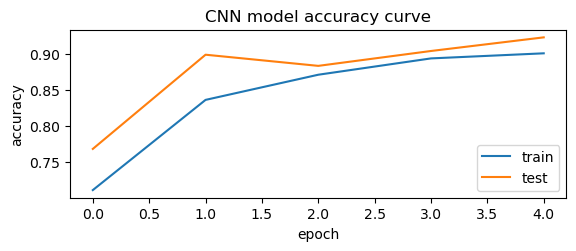

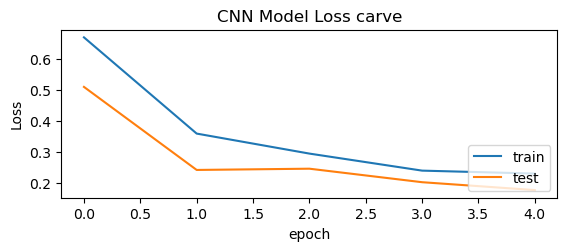

In [40]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('CNN model accuracy curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


plt.subplot(2,1,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('CNN Model Loss carve')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()



## Accuracy matrix

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step
Confusion matrix:



<Axes: >

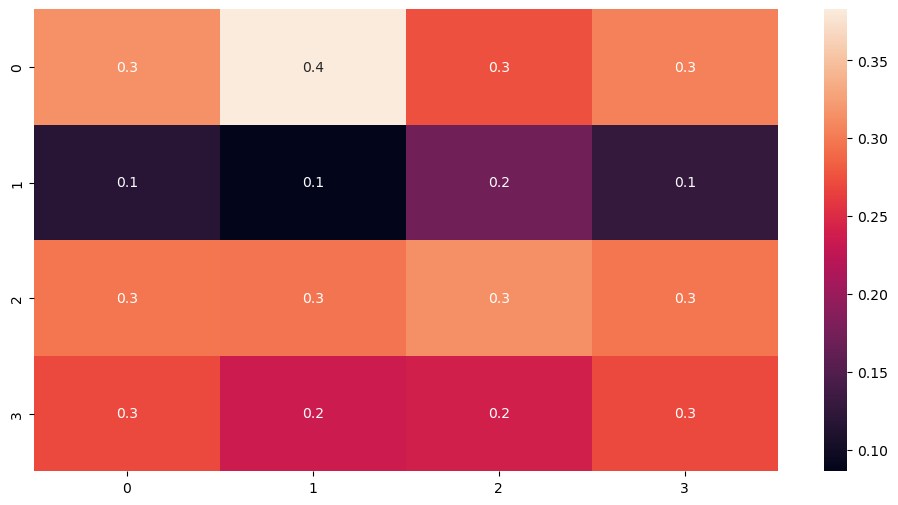

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



# Make predictions on the test data
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate the confusion matrix
conf_mat = confusion_matrix(val_ds.classes, y_pred_classes, normalize='pred')

print('Confusion matrix:\n')
plt.figure(figsize=(12,6))
sns.heatmap(conf_mat, annot=True, fmt=".1f")


## Save the model

In [42]:
model.save('dumped models/Corn_leaf_prediction_model.h5') 

## load the model

In [ ]:
import tensorflow as tf
# Load the saved model
loaded_model = tf.keras.models.load_model('dumped models/Corn_leaf_prediction_model.h5')

## prediction

In [ ]:

# Load a sample image (replace 'sample_image.jpg' with your image file)
img_path = 'datasets/BangladeshiCrops/Crop___Disease/Corn/Corn___Common_Rust/image (1).JPG'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = loaded_model.predict(img_array)


In [ ]:
# Postprocess predictions (if needed)
# This may involve mapping the output class indices to human-readable labels

# For example, if your model uses one-hot encoding and you have a class mapping:
class_mapping = {0: 'Corn__Common_Rust', 1: 'Corn__Gray_Leaf_Spot', 2: 'Potato___Healthy', 3: 'Corn__Northern_Leaf_blightt'}  # Replace with your class mapping

# Find the index of the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the human-readable label
predicted_class = class_mapping.get(predicted_class_index, 'Unknown')

# Print the prediction
print(f"Predicted Class: {predicted_class}")

# Potato

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define paths
input_folder = potato_dir
output_folder = r'datasets\BangladeshiCrops/working/potato'

# Split the dataset into train, validation, and test sets
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.15, 0.15))

train_dir = "datasets/BangladeshiCrops/working/potato/train"
test_dir = "datasets/BangladeshiCrops/working/potato/test"
val_dir = "datasets/BangladeshiCrops/working/potato/val"
generator_train = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)
generator_test = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)

generator_val = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)

train_ds = generator_train.flow_from_directory(train_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
test_ds = generator_test.flow_from_directory(test_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
val_ds = generator_val.flow_from_directory(val_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")

# Build the CNN model
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),
                 padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))
model.add(Conv2D(32, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))

model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=3,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


# Train the model
hist = model.fit(train_ds, batch_size=5, epochs=5, validation_split=5, validation_data=test_ds)
print('MODEL ACCURACY = {}%'.format(hist.history["accuracy"][-1]*100))


Copying files: 2152 files [00:04, 499.89 files/s]


Found 1506 images belonging to 3 classes.
Found 324 images belonging to 3 classes.
Found 322 images belonging to 3 classes.
Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 287ms/step - accuracy: 0.5722 - loss: 0.8682 - val_accuracy: 0.7963 - val_loss: 0.4843
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 264ms/step - accuracy: 0.8601 - loss: 0.4072 - val_accuracy: 0.8827 - val_loss: 0.3212
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step - accuracy: 0.8737 - loss: 0.3421 - val_accuracy: 0.8580 - val_loss: 0.3860
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 279ms/step - accuracy: 0.8942 - loss: 0.2864 - val_accuracy: 0.9475 - val_loss: 0.1761
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 275ms/step - accuracy: 0.8827 - loss: 0.2723 - val_accuracy: 0.9228 - val_loss: 0.2024
MODEL ACCURACY = 89.30943012237549%


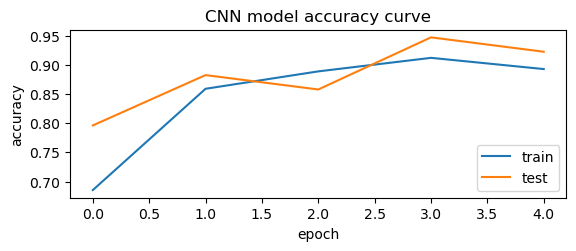

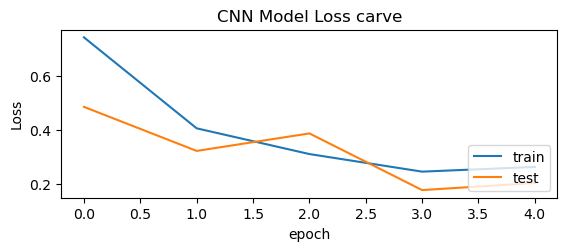

In [70]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('CNN model accuracy curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


plt.subplot(2,1,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('CNN Model Loss carve')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()



11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
Confusion matrix:



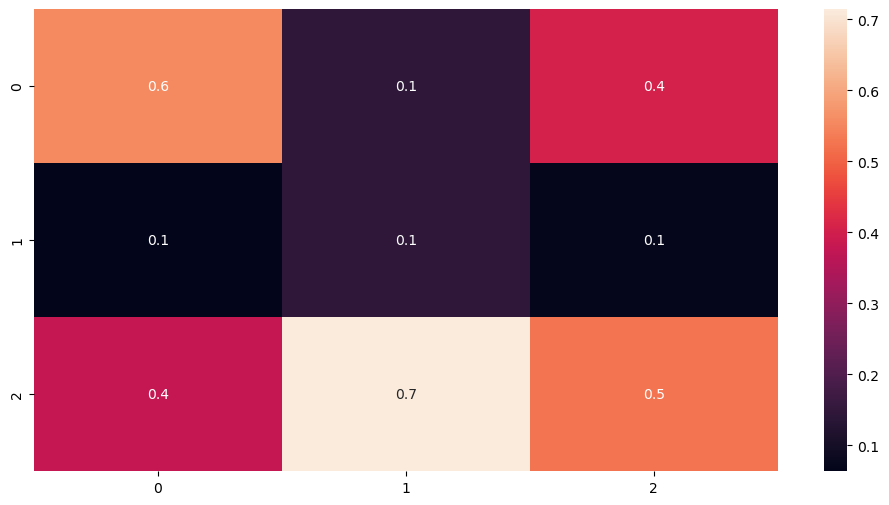

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test data
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate the confusion matrix
conf_mat = confusion_matrix(val_ds.classes, y_pred_classes, normalize='pred')

print('Confusion matrix:\n')
plt.figure(figsize=(12,6))
sns.heatmap(conf_mat, annot=True, fmt=".1f")
model.save('dumped models/Potato_leaf_prediction_model.h5') 
loaded_model = tf.keras.models.load_model('dumped models/Potato_leaf_prediction_model.h5')

In [78]:

# Load a sample image (replace 'sample_image.jpg' with your image file)
img_path = r'datasets/BangladeshiCrops/Crop___Disease/Potato/Potato___Healthy/0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL 1817.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = loaded_model.predict(img_array)


class_mapping = {0: 'Potato___Early_Blight', 1: 'Potato___Healthy', 2: 'Potato___Late_Blight'}  

# Find the index of the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the human-readable label
predicted_class = class_mapping.get(predicted_class_index, 'Unknown')

# Print the prediction
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Predicted Class: Potato___Early_Blight


# Rice

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define paths
input_folder = rice_dir
output_folder = r'datasets\BangladeshiCrops/working/rice'

# Split the dataset into train, validation, and test sets
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.15, 0.15))

train_dir = "datasets/BangladeshiCrops/working/rice/train"
test_dir = "datasets/BangladeshiCrops/working/rice/test"
val_dir = "datasets/BangladeshiCrops/working/rice/val"
generator_train = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)
generator_test = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)

generator_val = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)

train_ds = generator_train.flow_from_directory(train_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
test_ds = generator_test.flow_from_directory(test_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
val_ds = generator_val.flow_from_directory(val_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")

# Build the CNN model
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),
                 padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))
model.add(Conv2D(32, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))

model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=4,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


# Train the model
hist = model.fit(train_ds, batch_size=5, epochs=10, validation_split=5, validation_data=test_ds)
print('MODEL ACCURACY = {}%'.format(hist.history["accuracy"][-1]*100))


Copying files: 4078 files [00:12, 330.69 files/s]


Found 2853 images belonging to 4 classes.
Found 615 images belonging to 4 classes.
Found 610 images belonging to 4 classes.


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.3667 - loss: 1.3193 - val_accuracy: 0.6179 - val_loss: 0.8014
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.6149 - loss: 0.8255 - val_accuracy: 0.6358 - val_loss: 0.7504
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.6589 - loss: 0.7317 - val_accuracy: 0.6520 - val_loss: 0.7558
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.6531 - loss: 0.7418 - val_accuracy: 0.6813 - val_loss: 0.6980
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.6864 - loss: 0.6761 - val_accuracy: 0.6341 - val_loss: 0.7578
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.6643 - loss: 0.7088 - val_accuracy: 0.6780 - val_loss: 0.6930
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.7199 - loss: 0.6551 - val_accuracy: 0.6634 - val_loss: 0.7284
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.6961 - loss: 0.6560 - val_accuracy: 0.6976 - v

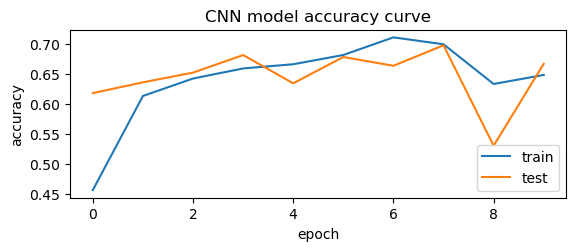

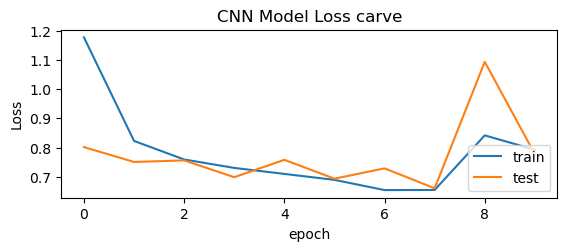

In [81]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('CNN model accuracy curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


plt.subplot(2,1,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('CNN Model Loss carve')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()



20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
Confusion matrix:



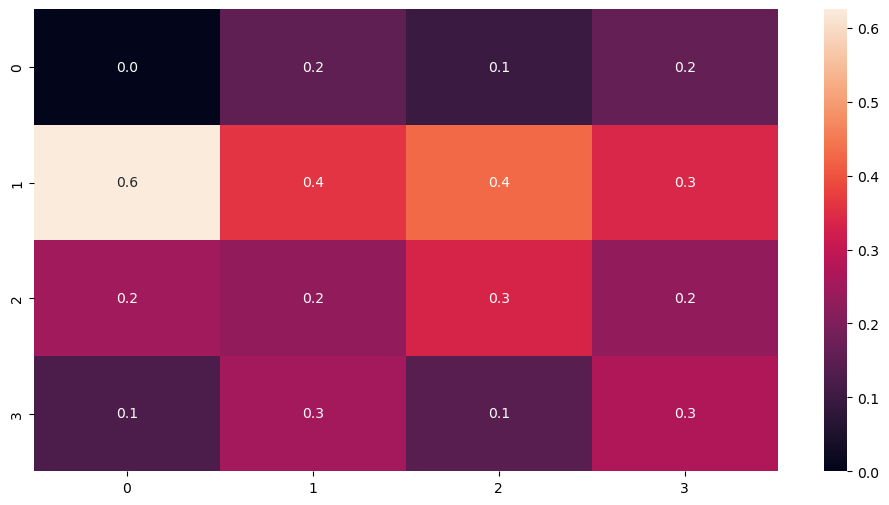

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test data
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate the confusion matrix
conf_mat = confusion_matrix(val_ds.classes, y_pred_classes, normalize='pred')

print('Confusion matrix:\n')
plt.figure(figsize=(12,6))
sns.heatmap(conf_mat, annot=True, fmt=".1f")
model.save('dumped models/Rice_leaf_prediction_model.h5') 
loaded_model = tf.keras.models.load_model('dumped models/Rice_leaf_prediction_model.h5')

In [83]:

# Load a sample image (replace 'sample_image.jpg' with your image file)
img_path = r'datasets/BangladeshiCrops/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_2980.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = loaded_model.predict(img_array)


class_mapping = {0: 'Rice___Brown_Spot', 1: 'Rice___Healthy', 2: 'Rice___Leaf_Blast', 3:'Rice___Neck_Blast'}  

# Find the index of the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the human-readable label
predicted_class = class_mapping.get(predicted_class_index, 'Unknown')

# Print the prediction
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted Class: Rice___Healthy


# Wheat

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define paths
input_folder = wheat_dir
output_folder = r'datasets\BangladeshiCrops/working/wheat'

# Split the dataset into train, validation, and test sets
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.15, 0.15))

train_dir = "datasets/BangladeshiCrops/working/wheat/train"
test_dir = "datasets/BangladeshiCrops/working/wheat/test"
val_dir = "datasets/BangladeshiCrops/working/wheat/val"
generator_train = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)
generator_test = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)

generator_val = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)

train_ds = generator_train.flow_from_directory(train_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
test_ds = generator_test.flow_from_directory(test_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
val_ds = generator_val.flow_from_directory(val_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")

# Build the CNN model
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),
                 padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))
model.add(Conv2D(32, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))

model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=3,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


# Train the model
hist = model.fit(train_ds, batch_size=5, epochs=5, validation_split=5, validation_data=test_ds)
print('MODEL ACCURACY = {}%'.format(hist.history["accuracy"][-1]*100))


In [ ]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('CNN model accuracy curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


plt.subplot(2,1,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('CNN Model Loss carve')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test data
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate the confusion matrix
conf_mat = confusion_matrix(val_ds.classes, y_pred_classes, normalize='pred')

print('Confusion matrix:\n')
plt.figure(figsize=(12,6))
sns.heatmap(conf_mat, annot=True, fmt=".1f")
model.save('dumped models/Wheat_leaf_prediction_model.h5') 
loaded_model = tf.keras.models.load_model('dumped models/Wheat_leaf_prediction_model.h5')

In [ ]:

# Load a sample image (replace 'sample_image.jpg' with your image file)
img_path = r'datasets/BangladeshiCrops/Crop___Disease/Wheat/Wheat___Healthy/Healthy008.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = loaded_model.predict(img_array)


class_mapping = {0: 'Wheat___Brown_Rust', 1: 'Wheat___Healthy', 2:'Wheat___Yellow_Rust'}  

# Find the index of the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the human-readable label
predicted_class = class_mapping.get(predicted_class_index, 'Unknown')

# Print the prediction
print(f"Predicted Class: {predicted_class}")
